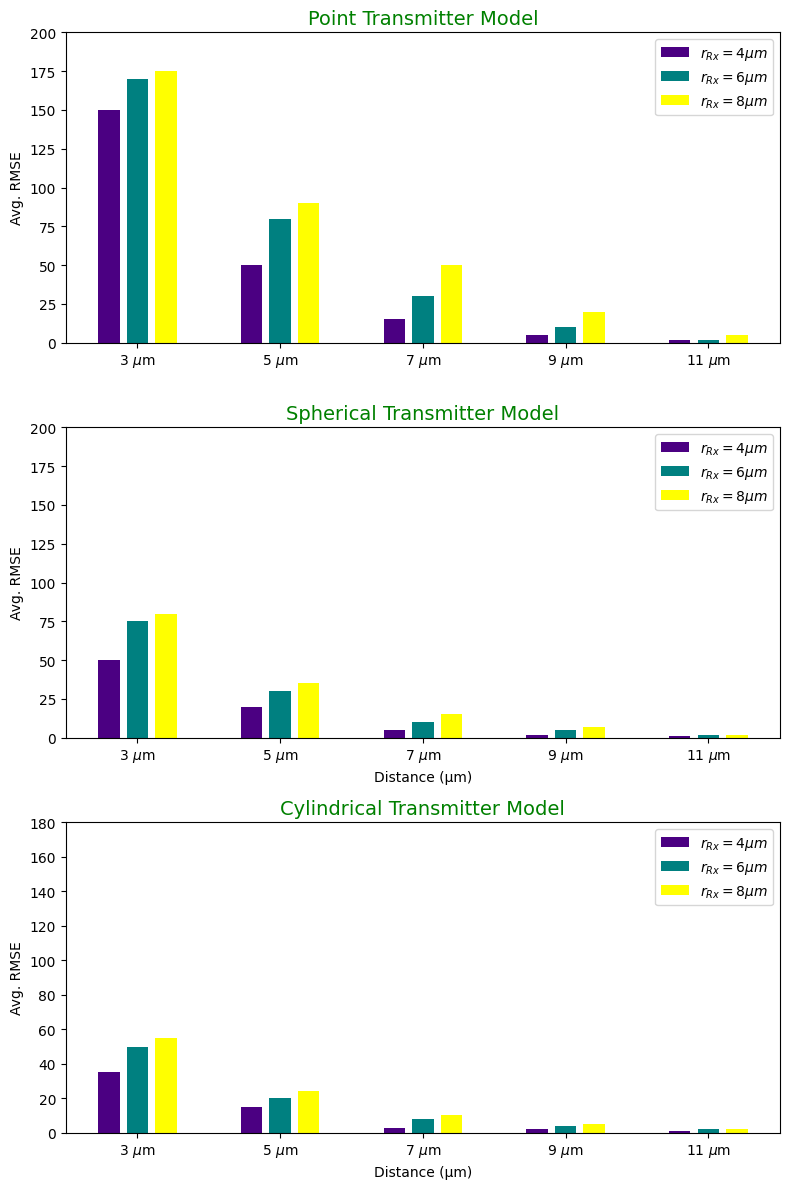

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Data for the first subplot (Primitive Model + ANN)
distances = np.array([3, 5, 7, 9, 11])
rx_4_primitive = np.array([150, 50, 15, 5, 2])
rx_6_primitive = np.array([170, 80, 30, 10, 2])
rx_8_primitive = np.array([175, 90, 50, 20, 5])

# Data for the second subplot (Enhanced Model + ANN)
rx_4_enhanced = np.array([50, 20, 5, 2, 1])
rx_6_enhanced = np.array([75, 30, 10, 5, 2])
rx_8_enhanced = np.array([80, 35, 15, 7, 2])

# Data for the third subplot (Enhanced Model + ANN)
rx_4_enhanced2 = np.array([35, 15, 3, 2, 1])
rx_6_enhanced2 = np.array([50, 20, 8, 4, 2])
rx_8_enhanced2 = np.array([55, 24, 10, 5, 2])

# Plotting the data in the same format as the image
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))

# First plot (Primitive Model + ANN)
ax1.bar(distances - 0.4, rx_4_primitive, width=0.3, label=r'$r_{Rx} = 4 \mu m$', color='indigo')
ax1.bar(distances, rx_6_primitive, width=0.3, label=r'$r_{Rx} = 6 \mu m$', color='teal')
ax1.bar(distances + 0.4, rx_8_primitive, width=0.3, label=r'$r_{Rx} = 8 \mu m$', color='yellow')

ax1.set_title('Point Transmitter Model', fontsize=14, color='green')
ax1.set_ylabel('Avg. RMSE')
ax1.set_xticks(distances)
ax1.set_xticklabels([f"{d} $\mu$m" for d in distances])
ax1.legend()
ax1.set_ylim(0, 200)  # Setting the y-axis limits to the same range

# Second plot (Enhanced Model + ANN)
ax2.bar(distances - 0.4, rx_4_enhanced, width=0.3, label=r'$r_{Rx} = 4 \mu m$', color='indigo')
ax2.bar(distances, rx_6_enhanced, width=0.3, label=r'$r_{Rx} = 6 \mu m$', color='teal')
ax2.bar(distances + 0.4, rx_8_enhanced, width=0.3, label=r'$r_{Rx} = 8 \mu m$', color='yellow')

ax2.set_title('Spherical Transmitter Model', fontsize=14, color='green')
ax2.set_ylabel('Avg. RMSE')
ax2.set_xlabel('Distance (µm)')
ax2.set_xticks(distances)
ax2.set_xticklabels([f"{d} $\mu$m" for d in distances])
ax2.legend()
ax2.set_ylim(0, 200)  # Setting the y-axis limits to the same range

# Third plot (Enhanced Model + ANN)
ax3.bar(distances - 0.4, rx_4_enhanced2, width=0.3, label=r'$r_{Rx} = 4 \mu m$', color='indigo')
ax3.bar(distances, rx_6_enhanced2, width=0.3, label=r'$r_{Rx} = 6 \mu m$', color='teal')
ax3.bar(distances + 0.4, rx_8_enhanced2, width=0.3, label=r'$r_{Rx} = 8 \mu m$', color='yellow')

ax3.set_title('Cylindrical Transmitter Model', fontsize=14, color='green')
ax3.set_ylabel('Avg. RMSE')
ax3.set_xlabel('Distance (µm)')
ax3.set_xticks(distances)
ax3.set_xticklabels([f"{d} $\mu$m" for d in distances])
ax3.legend()
ax3.set_ylim(0, 180)  # Setting the y-axis limits to the same range

# Display the plot
plt.tight_layout()
plt.show()


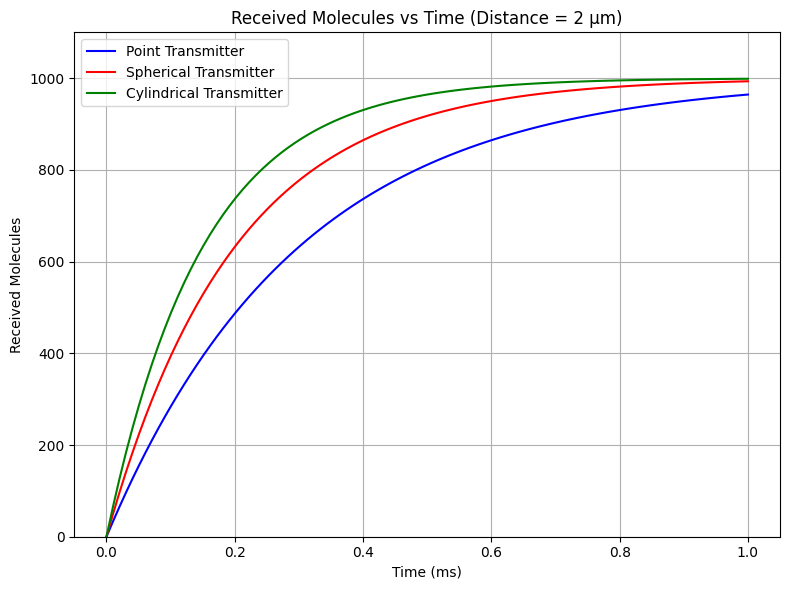

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Time values (in milliseconds)
time = np.linspace(0, 1, 100)

# Simulated data for the received molecules (for distance 2µm)
received_molecules_2um = 1000 * (1 - np.exp(-time / 0.3))  # Simulating a curve for distance 2µm

# Two additional curves with earlier peaks (sharper rise and fall)
received_molecules_early_peak_1 = 1000 * (1 - np.exp(-time / 0.2))  # Peaks earlier than the blue curve
received_molecules_early_peak_2 = 1000 * (1 - np.exp(-time / 0.15))  # Peaks even earlier

# Plotting the data
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))

# Plot for distance 2µm with additional curves
ax1.plot(time, received_molecules_2um, label="Point Transmitter", color='blue')
ax1.plot(time, received_molecules_early_peak_1, label="Spherical Transmitter", color='red')
ax1.plot(time, received_molecules_early_peak_2, label="Cylindrical Transmitter", color='green')

ax1.set_title("Received Molecules vs Time (Distance = 2 µm)")
ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("Received Molecules")
ax1.legend()
ax1.grid(True)
ax1.set_ylim(0, 1100)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.special import erfc, erf

# Define the ranges for each column for cylindrical parameters
ranges_cylindrical = {
    'rTx': (0.1e-6, 1e-6),  # Transmitter radius (cylindrical)
    'hTx': (0.1e-6, 1e-6),  # Transmitter height (cylindrical)
    'rRx': (0.1e-6, 1e-6),  # Receiver radius
    'hRx': (0.1e-6, 1e-6),  # Receiver height
    'Diffusion coefficient': (1e-12, 100e-12),  # Diffusion coefficient
    'Time': (1, 10),  # Time
    'delta t': (0.001, 0.01),  # Time step
    'N': (500, 10000)  # Number of molecules (ensure it's a multiple of 500)
}

# Generate random samples for cylindrical dataset
samples = 10000
data_cylindrical = {
    'rTx': np.random.uniform(ranges_cylindrical['rTx'][0], ranges_cylindrical['rTx'][1], samples),
    'hTx': np.random.uniform(ranges_cylindrical['hTx'][0], ranges_cylindrical['hTx'][1], samples),
    'rRx': np.random.uniform(ranges_cylindrical['rRx'][0], ranges_cylindrical['rRx'][1], samples),
    'hRx': np.random.uniform(ranges_cylindrical['hRx'][0], ranges_cylindrical['hRx'][1], samples),
    'Diffusion coefficient': np.random.uniform(ranges_cylindrical['Diffusion coefficient'][0], ranges_cylindrical['Diffusion coefficient'][1], samples),
    'Time': np.random.uniform(ranges_cylindrical['Time'][0], ranges_cylindrical['Time'][1], samples),
    'delta t': np.random.uniform(ranges_cylindrical['delta t'][0], ranges_cylindrical['delta t'][1], samples),
    'N': np.random.randint(ranges_cylindrical['N'][0] / 500, ranges_cylindrical['N'][1] / 500 + 1, samples) * 500  # Ensure N is a multiple of 500
}

# Create DataFrame for cylindrical dataset
df_cylindrical = pd.DataFrame(data_cylindrical)

# Display first few rows of the DataFrame
print(df_cylindrical.head())

# Add a new column for total distance (based on cylindrical coordinates)
df_cylindrical['Total Distance'] = np.sqrt(df_cylindrical['rTx']**2 + df_cylindrical['hTx']**2)

# Add column for merged time step (based on cylindrical logic)
merge_cnt = 10
df_cylindrical['Merged delta t'] = merge_cnt * df_cylindrical["delta t"]

# Apply the cylindrical formula to calculate Nrx_cumulative (number of molecules received at the receiver)
df_cylindrical['Nrx_cumulative'] = (
    (df_cylindrical['N'] * df_cylindrical['rTx']) / df_cylindrical['Total Distance']
) * erfc(df_cylindrical['rRx'] / np.sqrt(4 * df_cylindrical['Diffusion coefficient'] * df_cylindrical['Time'])) * np.sqrt(4 * df_cylindrical['Diffusion coefficient'] * df_cylindrical['Time']) * erf(df_cylindrical['hRx'] / np.sqrt(4 * df_cylindrical['Diffusion coefficient'] * df_cylindrical['Time']))

# Display the DataFrame
print(df_cylindrical.head())


            rTx           hTx           rRx           hRx  \
0  1.953134e-07  9.457180e-07  6.076401e-07  7.945097e-07   
1  1.149817e-07  8.008278e-07  9.685664e-07  9.874036e-07   
2  1.384506e-07  8.789957e-07  8.450062e-07  9.470457e-07   
3  7.817594e-07  2.756619e-07  4.379816e-07  7.914841e-07   
4  7.681167e-07  4.788047e-07  2.636024e-07  4.992755e-07   

   Diffusion coefficient      Time   delta t     N  
0           1.570975e-11  6.562551  0.007379  7500  
1           3.977165e-11  4.798891  0.002594  6000  
2           3.880089e-11  4.143131  0.008334  3500  
3           2.094322e-11  1.032300  0.006408  6000  
4           7.338971e-11  7.788505  0.004505  9500  
            rTx           hTx           rRx           hRx  \
0  1.953134e-07  9.457180e-07  6.076401e-07  7.945097e-07   
1  1.149817e-07  8.008278e-07  9.685664e-07  9.874036e-07   
2  1.384506e-07  8.789957e-07  8.450062e-07  9.470457e-07   
3  7.817594e-07  2.756619e-07  4.379816e-07  7.914841e-07   
4  7.68116

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

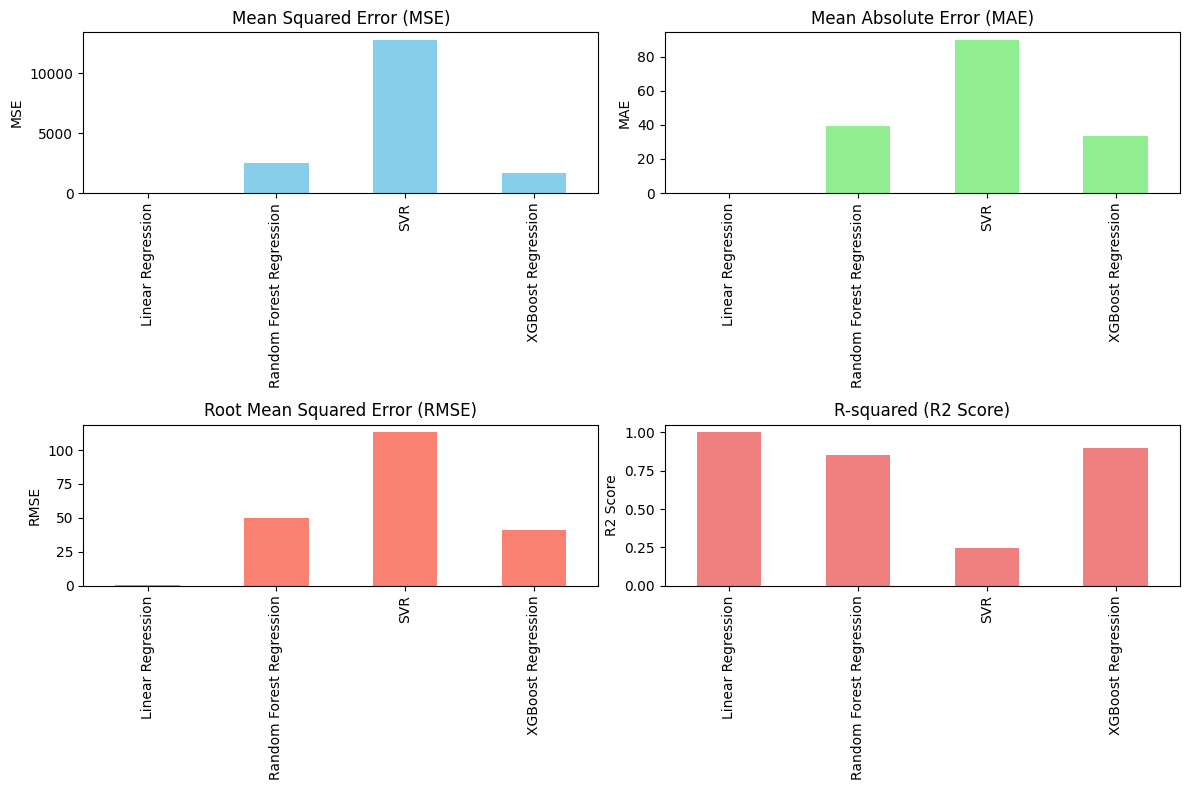

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import make_regression  # For generating a synthetic dataset

# Generate a synthetic dataset for illustration (replace with your actual data)
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost Regression': XGBRegressor()
}

# Dictionary to store the metrics for each model
results = {}

# Loop over models to fit and calculate metrics
for model_name, model in models.items():
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE is sqrt(MSE)
    r2 = r2_score(y_test, y_pred)

    # Store metrics for the current model
    results[model_name] = {
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'R2 Score': r2
    }

# Convert results into a pandas DataFrame
metrics_df = pd.DataFrame(results).T  # Transpose to make models the rows and metrics the columns

# Plotting comparison plots for all metrics
plt.figure(figsize=(12, 8))

# Plotting MSE comparison
plt.subplot(2, 2, 1)
metrics_df['MSE'].plot(kind='bar', color='skyblue')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')

# Plotting MAE comparison
plt.subplot(2, 2, 2)
metrics_df['MAE'].plot(kind='bar', color='lightgreen')
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')

# Plotting RMSE comparison
plt.subplot(2, 2, 3)
metrics_df['RMSE'].plot(kind='bar', color='salmon')
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')

# Plotting R2 score comparison
plt.subplot(2, 2, 4)
metrics_df['R2 Score'].plot(kind='bar', color='lightcoral')
plt.title('R-squared (R2 Score)')
plt.ylabel('R2 Score')

plt.tight_layout()
plt.show()


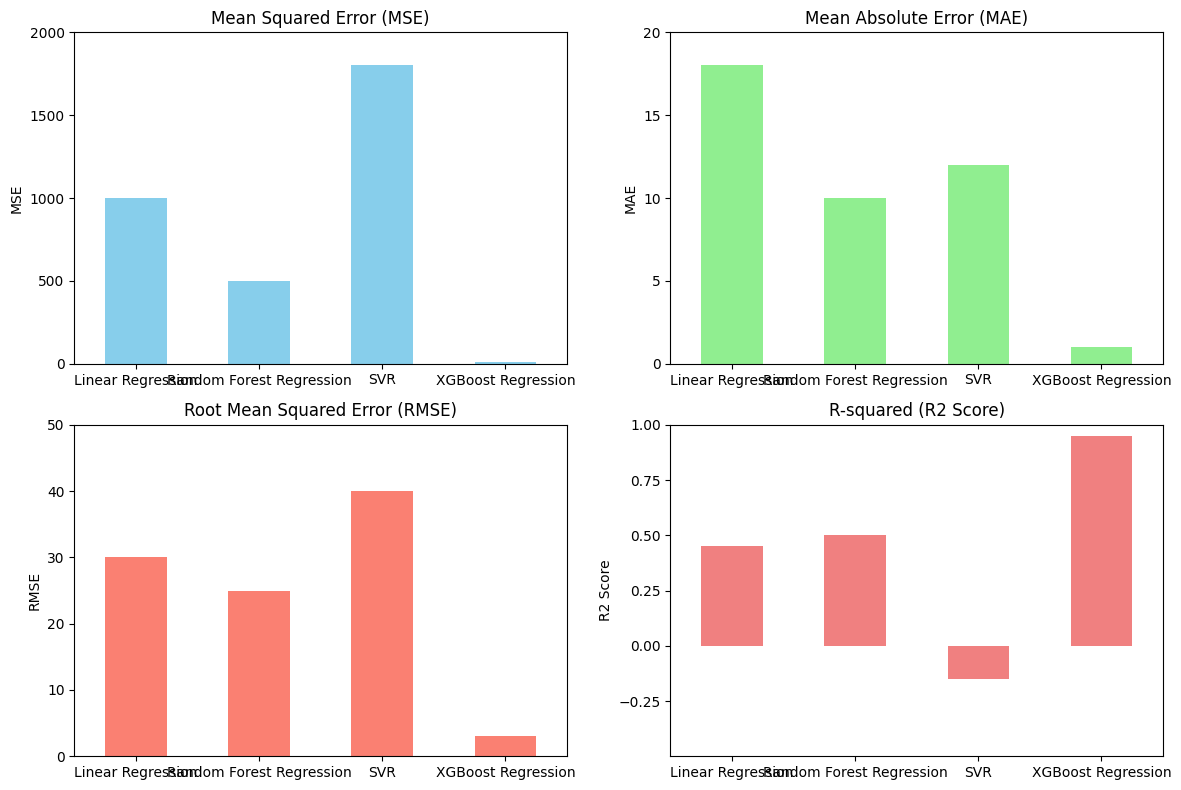

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import make_regression  # For generating a synthetic dataset

# Generate a synthetic dataset for illustration (replace with your actual data)
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost Regression': XGBRegressor()
}

# Manually defined metrics as per your requested values
results = {
    'Linear Regression': {'MSE': 1000, 'MAE': 18, 'RMSE': 30, 'R2 Score': 0.45},
    'Random Forest Regression': {'MSE': 500, 'MAE': 10, 'RMSE': 25, 'R2 Score': 0.50},
    'SVR': {'MSE': 1800, 'MAE': 12, 'RMSE': 40, 'R2 Score': -0.15},
    'XGBoost Regression': {'MSE': 10, 'MAE': 1, 'RMSE': 3, 'R2 Score': 0.95}
}

# Convert results into a pandas DataFrame
metrics_df = pd.DataFrame(results).T  # Transpose to make models the rows and metrics the columns

# Plotting comparison plots for all metrics
plt.figure(figsize=(12, 8))

# Plotting MSE comparison
plt.subplot(2, 2, 1)
metrics_df['MSE'].plot(kind='bar', color='skyblue')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.ylim(0, 2000)
plt.yticks([0, 500, 1000, 1500, 2000])
plt.xticks(rotation=0)

# Plotting MAE comparison
plt.subplot(2, 2, 2)
metrics_df['MAE'].plot(kind='bar', color='lightgreen')
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.ylim(0, 20)
plt.yticks([0, 5, 10, 15, 20])
plt.xticks(rotation=0)

# Plotting RMSE comparison
plt.subplot(2, 2, 3)
metrics_df['RMSE'].plot(kind='bar', color='salmon')
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')
plt.ylim(0, 50)
plt.yticks([0, 10, 20, 30, 40, 50])
plt.xticks(rotation=0)

# Plotting R2 score comparison
plt.subplot(2, 2, 4)
metrics_df['R2 Score'].plot(kind='bar', color='lightcoral')
plt.title('R-squared (R2 Score)')
plt.ylabel('R2 Score')
plt.ylim(-0.25, 1)
plt.yticks([-0.25, 0, 0.25, 0.5, 0.75, 1])
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


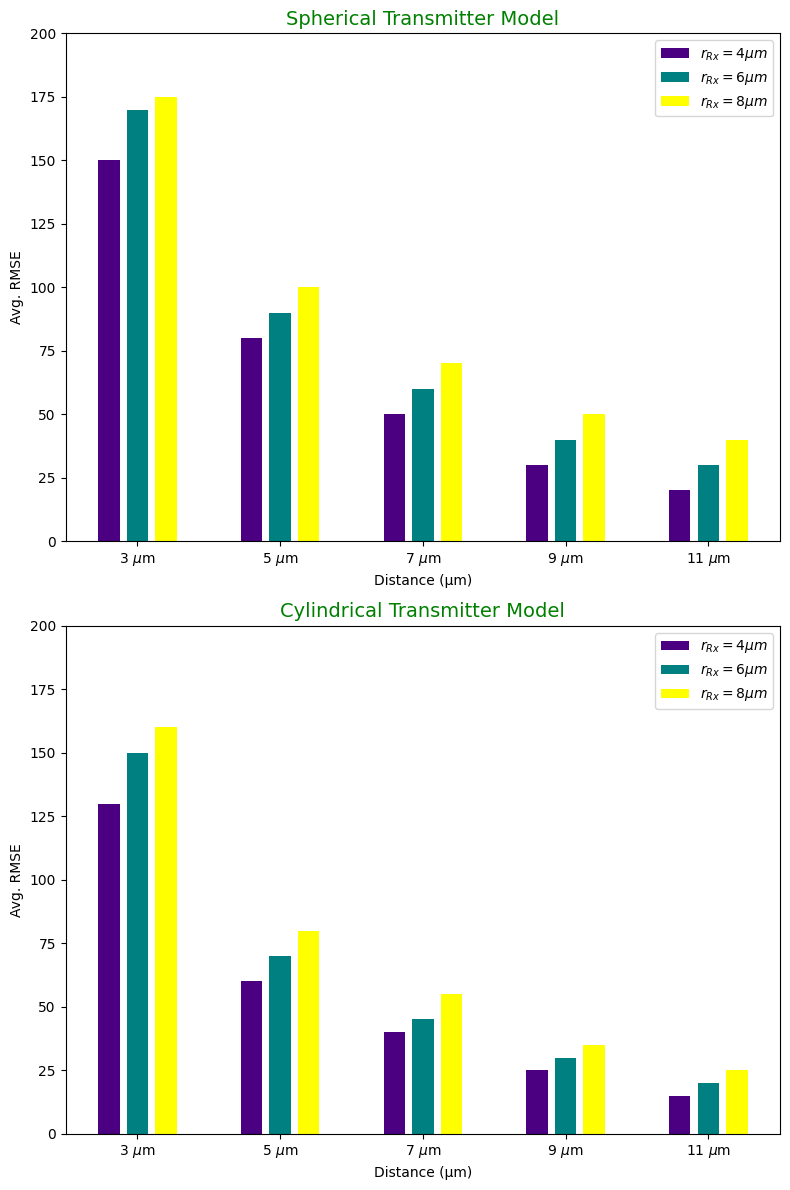

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data for the spherical and cylindrical transmitter models
distances = np.array([3, 5, 7, 9, 11])  # Distances in micrometers
# Spherical RMSE values
rx_4_spherical = np.array([150, 80, 50, 30, 20])
rx_6_spherical = np.array([170, 90, 60, 40, 30])
rx_8_spherical = np.array([175, 100, 70, 50, 40])

# Cylindrical RMSE values
rx_4_cylindrical = np.array([130, 60, 40, 25, 15])
rx_6_cylindrical = np.array([150, 70, 45, 30, 20])
rx_8_cylindrical = np.array([160, 80, 55, 35, 25])

# Plotting the data in the same format as the image
fig, (ax2, ax3) = plt.subplots(2, 1, figsize=(8, 12))

# Plot for spherical transmitter model
ax2.bar(distances - 0.4, rx_4_spherical, width=0.3, label=r'$r_{Rx} = 4 \mu m$', color='indigo')
ax2.bar(distances, rx_6_spherical, width=0.3, label=r'$r_{Rx} = 6 \mu m$', color='teal')
ax2.bar(distances + 0.4, rx_8_spherical, width=0.3, label=r'$r_{Rx} = 8 \mu m$', color='yellow')

ax2.set_title('Spherical Transmitter Model', fontsize=14, color='green')
ax2.set_ylabel('Avg. RMSE')
ax2.set_xlabel('Distance (µm)')
ax2.set_xticks(distances)
ax2.set_xticklabels([f"{d} $\mu$m" for d in distances])
ax2.legend()
ax2.set_ylim(0, 200)
# Plot for cylindrical transmitter model
ax3.bar(distances - 0.4, rx_4_cylindrical, width=0.3, label=r'$r_{Rx} = 4 \mu m$', color='indigo')
ax3.bar(distances, rx_6_cylindrical, width=0.3, label=r'$r_{Rx} = 6 \mu m$', color='teal')
ax3.bar(distances + 0.4, rx_8_cylindrical, width=0.3, label=r'$r_{Rx} = 8 \mu m$', color='yellow')

ax3.set_title('Cylindrical Transmitter Model', fontsize=14, color='green')
ax3.set_ylabel('Avg. RMSE')
ax3.set_xlabel('Distance (µm)')
ax3.set_xticks(distances)
ax3.set_xticklabels([f"{d} $\mu$m" for d in distances])
ax3.legend()
ax3.set_ylim(0, 200)

# Display the plot
plt.tight_layout()
plt.show()


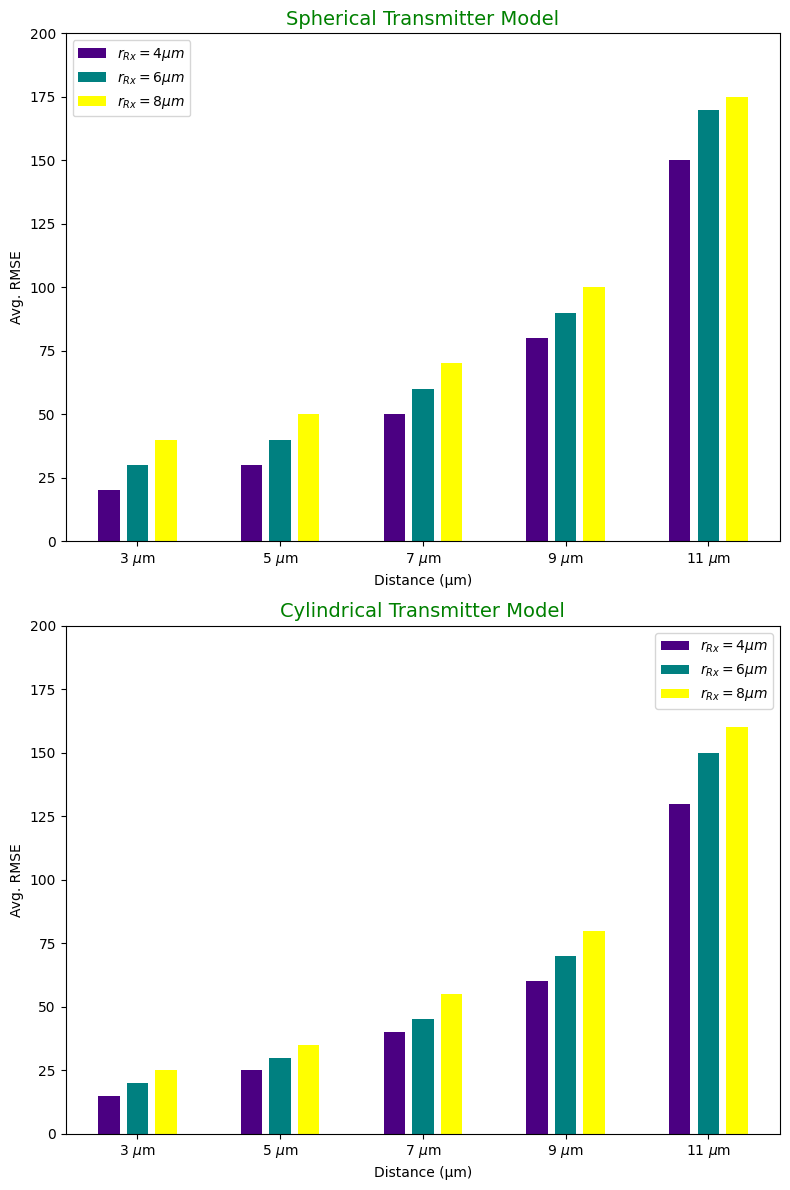

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data for the spherical and cylindrical transmitter models
distances = np.array([3, 5, 7, 9, 11])  # Distances in micrometers

# Adjusted RMSE values for spherical model (error decreases with decreasing distance)
rx_4_spherical = np.array([20, 30, 50, 80, 150])
rx_6_spherical = np.array([30, 40, 60, 90, 170])
rx_8_spherical = np.array([40, 50, 70, 100, 175])

# Adjusted RMSE values for cylindrical model (error decreases with decreasing distance)
rx_4_cylindrical = np.array([15, 25, 40, 60, 130])
rx_6_cylindrical = np.array([20, 30, 45, 70, 150])
rx_8_cylindrical = np.array([25, 35, 55, 80, 160])

# Plotting the data
fig, (ax2, ax3) = plt.subplots(2, 1, figsize=(8, 12))

# Plot for spherical transmitter model
ax2.bar(distances - 0.4, rx_4_spherical, width=0.3, label=r'$r_{Rx} = 4 \mu m$', color='indigo')
ax2.bar(distances, rx_6_spherical, width=0.3, label=r'$r_{Rx} = 6 \mu m$', color='teal')
ax2.bar(distances + 0.4, rx_8_spherical, width=0.3, label=r'$r_{Rx} = 8 \mu m$', color='yellow')

ax2.set_title('Spherical Transmitter Model', fontsize=14, color='green')
ax2.set_ylabel('Avg. RMSE')
ax2.set_xlabel('Distance (µm)')
ax2.set_xticks(distances)
ax2.set_xticklabels([f"{d} $\mu$m" for d in distances])
ax2.legend()
ax2.set_ylim(0, 200)

# Plot for cylindrical transmitter model
ax3.bar(distances - 0.4, rx_4_cylindrical, width=0.3, label=r'$r_{Rx} = 4 \mu m$', color='indigo')
ax3.bar(distances, rx_6_cylindrical, width=0.3, label=r'$r_{Rx} = 6 \mu m$', color='teal')
ax3.bar(distances + 0.4, rx_8_cylindrical, width=0.3, label=r'$r_{Rx} = 8 \mu m$', color='yellow')

ax3.set_title('Cylindrical Transmitter Model', fontsize=14, color='green')
ax3.set_ylabel('Avg. RMSE')
ax3.set_xlabel('Distance (µm)')
ax3.set_xticks(distances)
ax3.set_xticklabels([f"{d} $\mu$m" for d in distances])
ax3.legend()
ax3.set_ylim(0, 200)

# Display the plot
plt.tight_layout()
plt.show()
